In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy %.3f"%accuracy_score(y_test, y_pred))

Accuracy 0.978


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, clf, test_idx=None,
                          resolution=.02):
  plt.figure(figsize=(10, 6))
  markers = ("o", "s", "^", "v", "c")
  colors = ("red", "blue", "lightgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  lab = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, alpha=.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha=.8,
                c=colors[idx],
                marker=markers[idx],
                label=f"Class {cl}",
                edgecolor="black")

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                c="none", edgecolor="black", alpha=1.0,
                s=100, label="Test set")

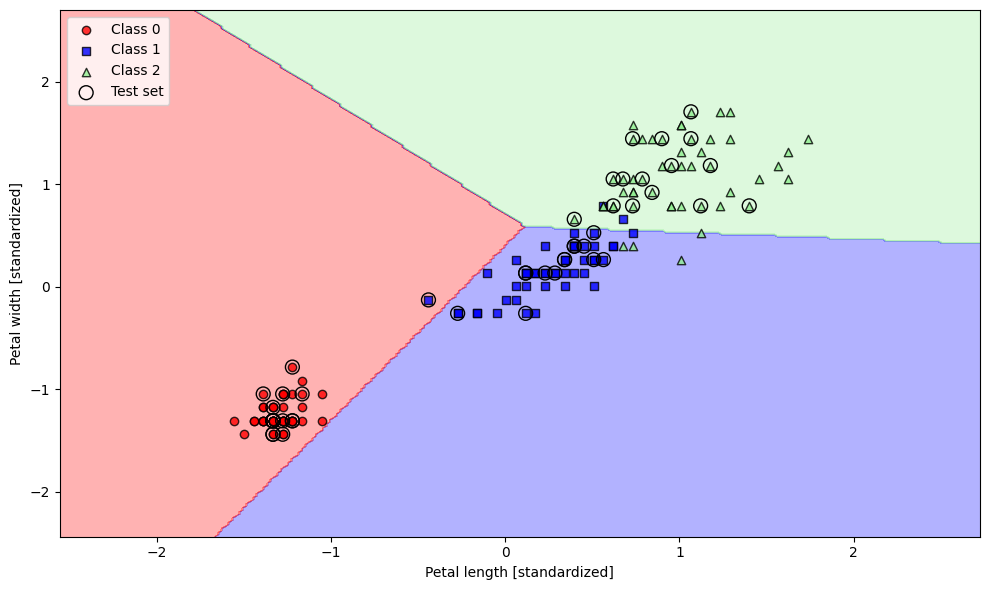

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      clf=ppn,
                      test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

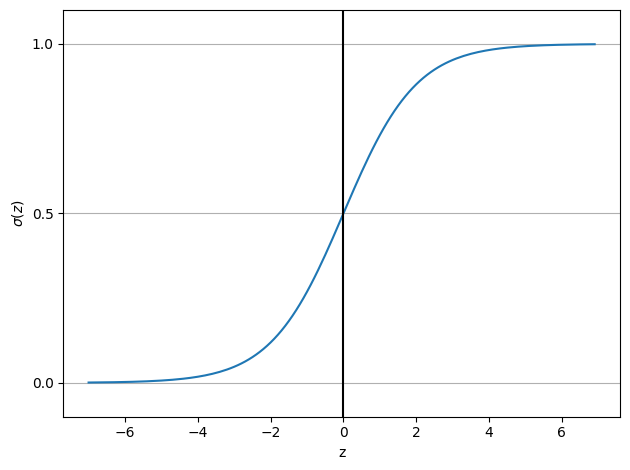

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1. / (1. + np.exp(-z))
z = np.arange(-7, 7, .1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(.0, color="k")
plt.ylim(-.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")
plt.yticks([.0, .5, 1.])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

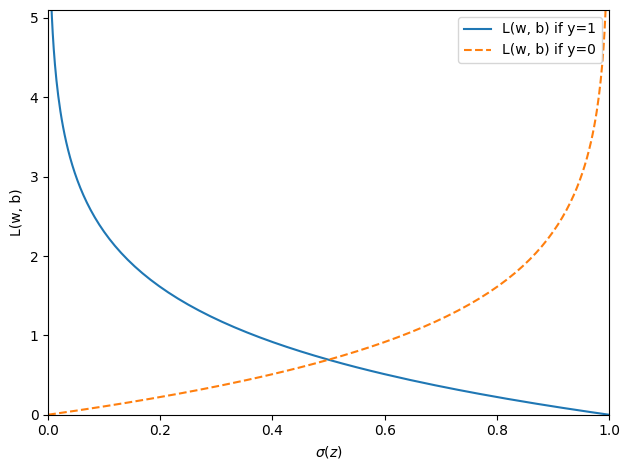

In [ ]:
def loss_1(z):
  return - np.log(sigmoid(z))
def loss_0(z):
  return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
class LogisticRegressionGD:
  def __init__(self, eta=.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=.0, scale=.01, size=X.shape[1])
    self.b_ = np.float(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2. * X.T.dot(errors) / X.shape[0]
      loss = (-y.dot(np.log(output))
              - ((1 - y).dot(np.log(1 - output)))
              / X.shape[0])
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, z):
    """Compute logistic sigmoid activation"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<ipython-input-11-fd75f675b861>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


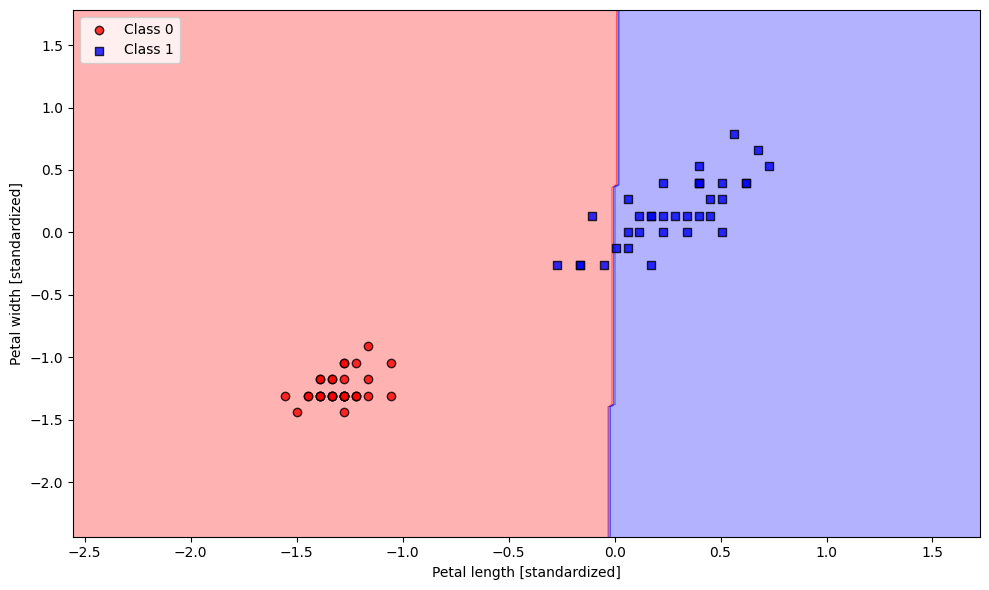

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3,
n_iter=1000,
random_state=1)
lrgd.fit(X_train_01_subset,
y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      clf=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

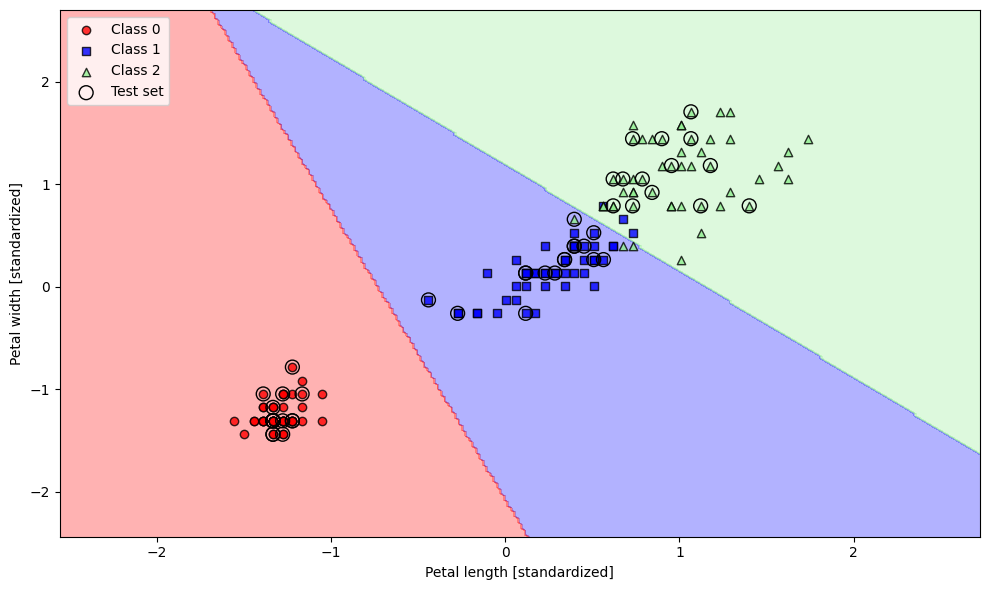

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs',
multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      clf=lr,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [ ]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
y_test[:3]

array([2, 0, 0])

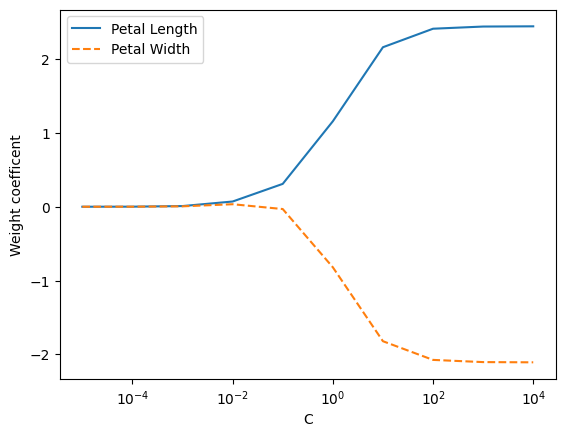

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c,
                          multi_class="ovr")
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
           label="Petal Length")
plt.plot(params, weights[:, 1], linestyle="--",
           label="Petal Width")
plt.ylabel("Weight coefficent")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

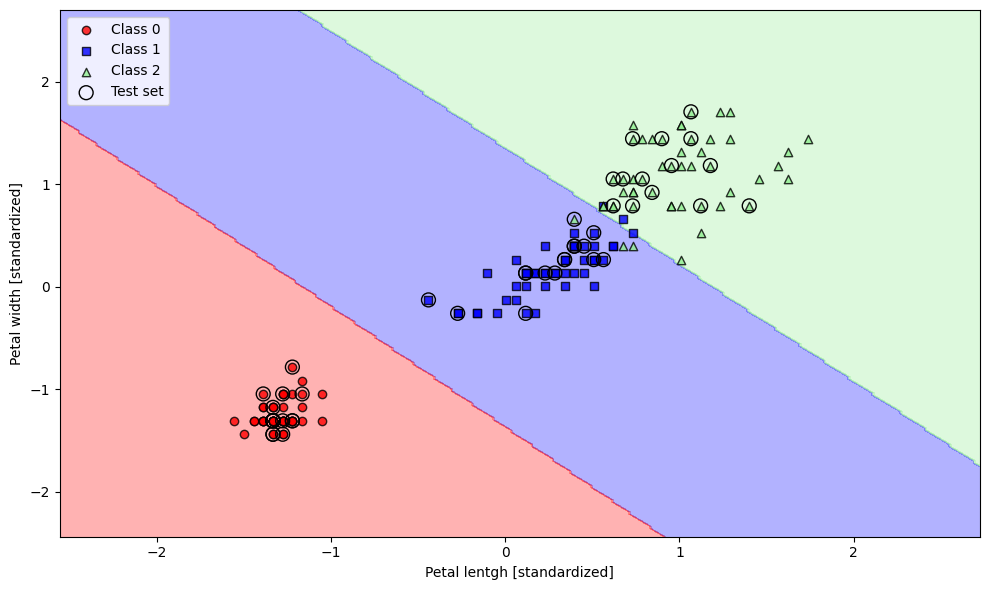

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1., random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      clf=svm,
                      test_idx=range(105, 150))
plt.xlabel("Petal lentgh [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")
svm = SGDClassifier(loss="hinge")

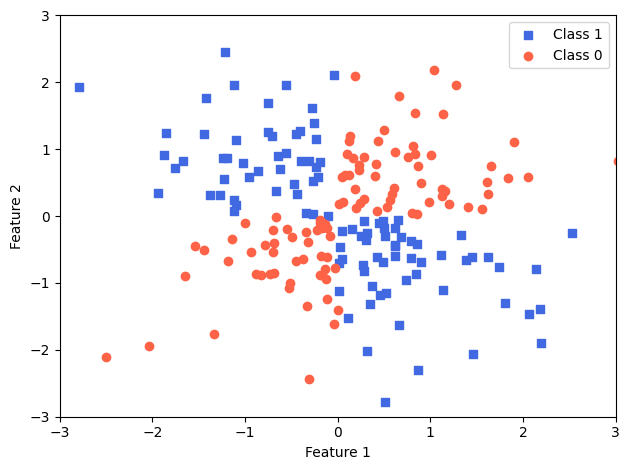

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

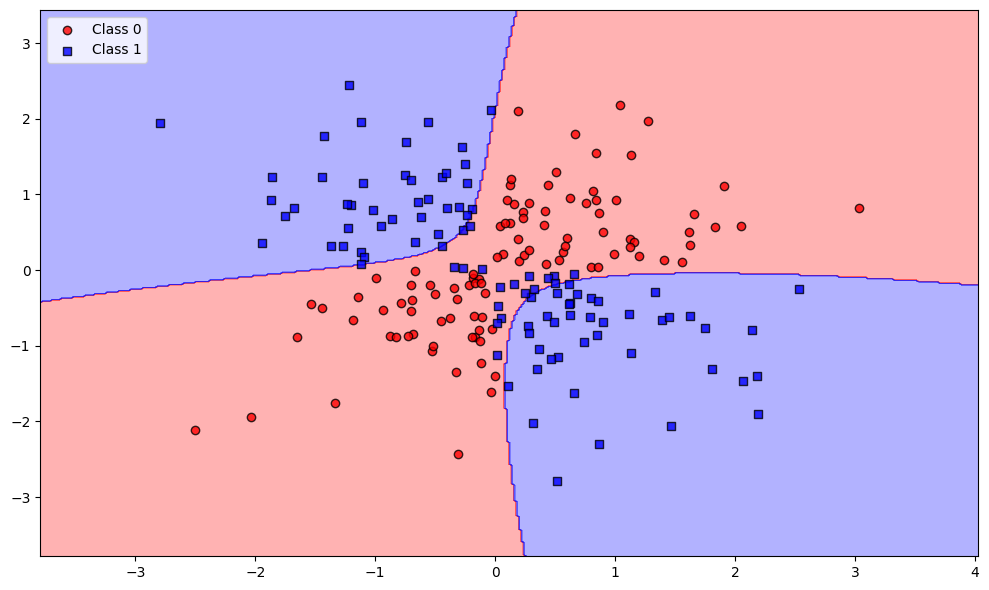

In [ ]:
svm = SVC(kernel="rbf", random_state=1, gamma=.10, C=10.)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, clf=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

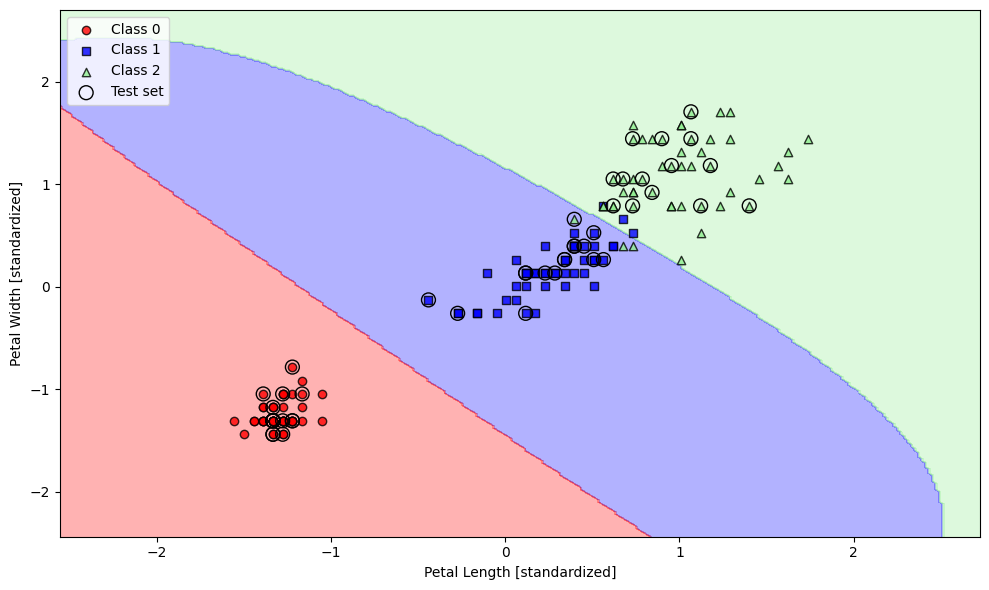

In [ ]:
svm = SVC(kernel="rbf", random_state=1, gamma=.2, C=1.)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=svm,
                      test_idx=range(105, 150))
plt.xlabel("Petal Length [standardized]")
plt.ylabel("Petal Width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

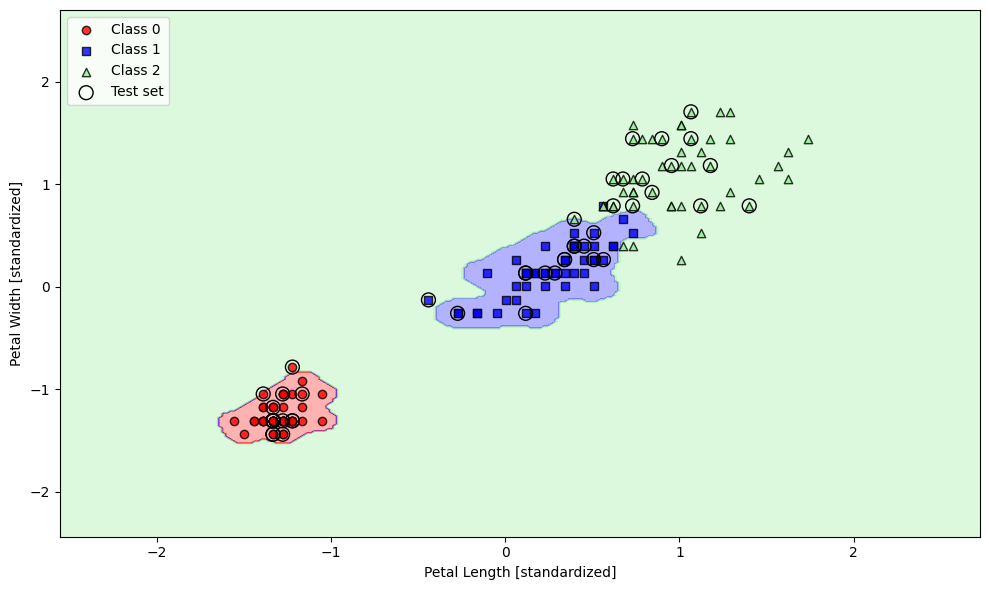

In [ ]:
svm = SVC(kernel="rbf", random_state=1, gamma=100., C=1.)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=svm,
                      test_idx=range(105, 150))
plt.xlabel("Petal Length [standardized]")
plt.ylabel("Petal Width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

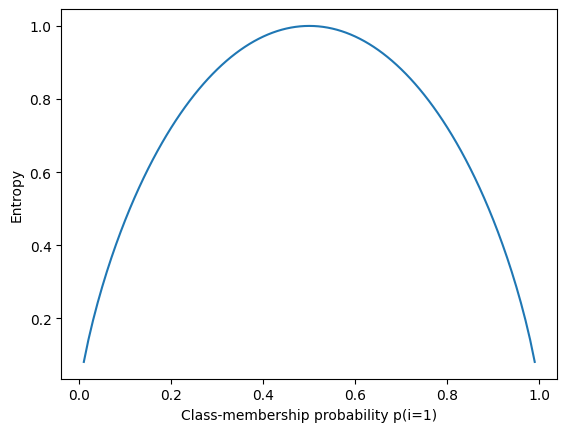

In [ ]:
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel("Entropy")
plt.xlabel("Class-membership probability p(i=1)")
plt.plot(x, ent)
plt.show()

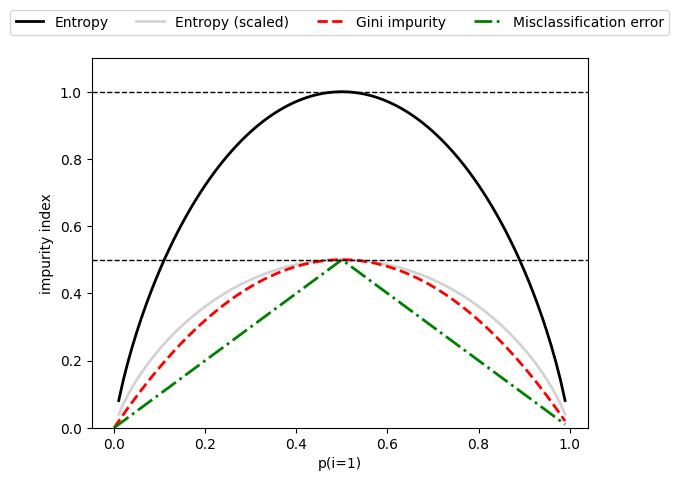

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return p*(1-p) + (1 - p)*(1 -(1 - p))

def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1 - p])

np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ["Entropy", "Entropy (scaled)",
                          "Gini impurity",
                          "Misclassification error"],
                         ["-", "-", "--", "-."],
                         ["black", "lightgray",
                          "red", "green", "cyan"]):
  line = ax.plot(x, i, label=lab,
                 linestyle=ls, lw=2, color=c)

ax.legend(loc="upper center", bbox_to_anchor=(.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=.5, linewidth=1, color="k", linestyle="--")
ax.axhline(y=1.0, linewidth=1, color="k", linestyle="--")
plt.ylim([0, 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("impurity index")
plt.show()

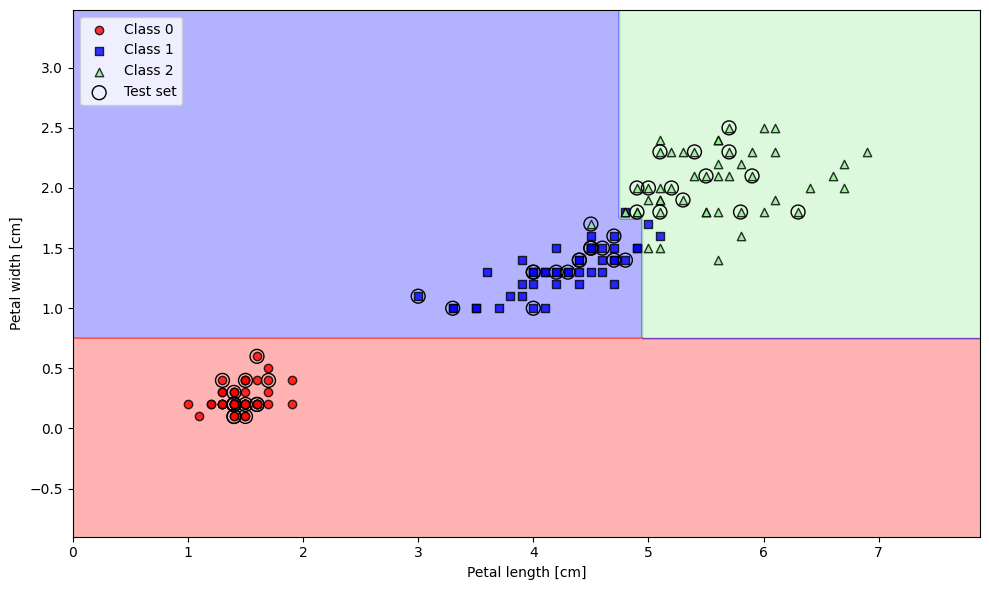

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion="gini",
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      clf=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

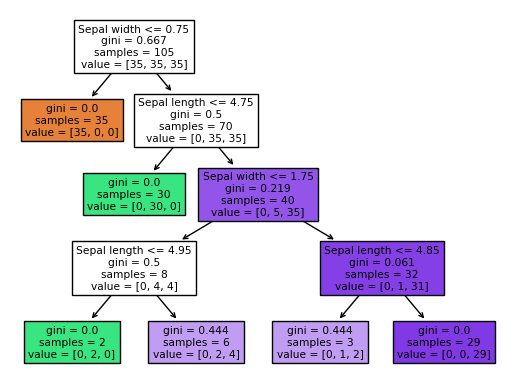

In [ ]:
from sklearn import tree

feature_names = ["Sepal length", "Sepal width",
                 "Petal length", "Petal width"]
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

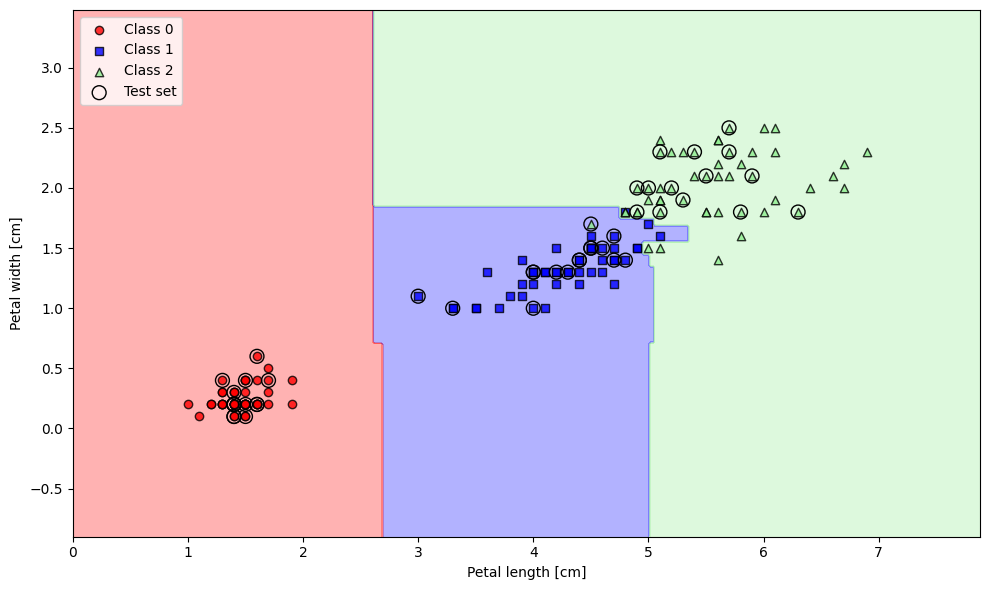

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      clf=forest, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

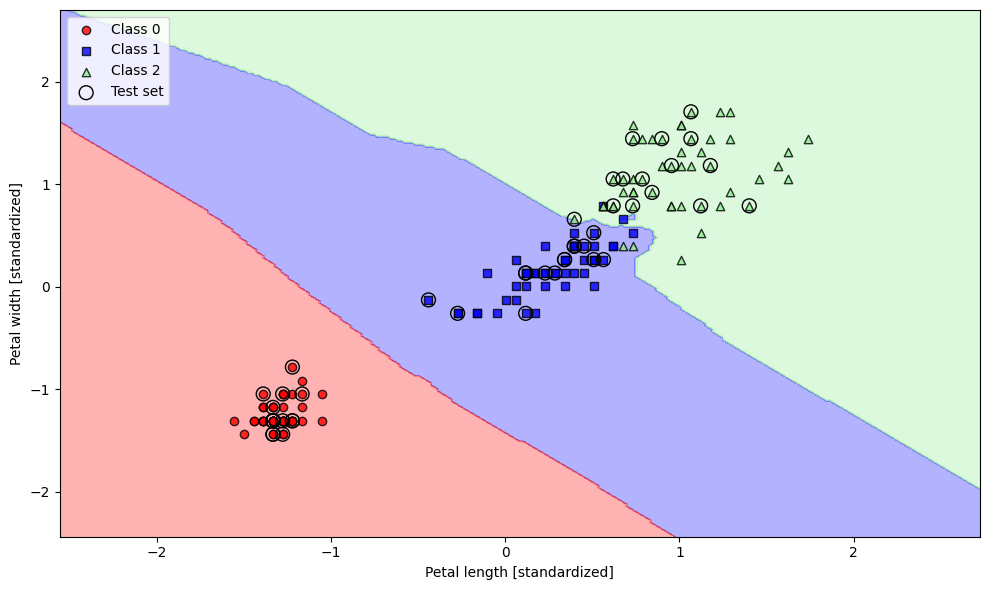

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      clf=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()